`Задание:`

Построить модель машинного обучения, позволяющую предсказать, является ли цветок цветком класса Ирис-Вирджиния или нет.

`План решения:`

- Из библиотеки scikit-learn подгрузите данные. Мы уже работали с ними в рамках Темы 1.

- Сформируйте новое поле `target_virginica`, которое будет равно 0, если цветок не является классом 2, иначе  — 1. Убедитесь, что разметка выполнена корректно, рассчитав количество объектов каждого класса по новой целевой переменной target_virginica.

- Обучите `библиотечную` модель `логистической регрессии` на обучающей части данных.

- `Оцените качество` обученной на предыдущем шаге модели, выведя `матрицу ошибок `для прогнозов обученной моделью на `тестовой` `части` данных.

- Сконструируйте свой класс `MyLogisticRegression`, решающий задачу логистической регрессии методом градиентного спуска.

>Он должен инициализироваться величиной шага градиентного спуска и количеством итераций градиентного спуска.

>Должен содержать метод `fit` для обучения модели, на вход которой будут подаваться обучающие данные. Чтобы реализовать функцию sigmoid, можно воспользоваться библиотечной функцией np.exp. Для расчета градиента необходимо использовать формулу, приведенную в курсе в блоке «Логистическая регрессия для решения задачи бинарной классификации».

>Должен содержаться метод `predict`, который будет возвращать лейбл 0/1. Лейбл должен рассчитываться из вероятности принадлежности классу 1. Вероятность должна рассчитываться как `сигмоида` от результата произведения матрицы фичей X и вектора весов модели w.

- Обучите модель с помощью реализованного класса с произвольными параметрами градиентного спуска.

- Оцените качество модели, обученной с помощью класса `MyLogisticRegression`, выведя матрицу ошибок для прогнозов обученной моделью `на тестовой` части данных. `Подберите` такие параметры градиентного спуска, чтобы разделение получилось `не хуже`, чем у `библиотечной` модели.


In [1]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

import numpy as np

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
# Сформируем новое поле target_virginica
target_virginica = (y == 2).astype(int)

In [4]:
# обучим библиотечную модель и выведем матрицу ошибок

# Перемешаем наши классы

# вектор признаков - X , целевой вектор - y
# Для воспроизводимости установим аргумент - random_state
# Определим test_size (либо train_size), оба они не нужны. Если вы явно установить оба параметра, они должны составлять в сумме 1.

# X_train  и  X_test - представляют собой признаки объектов  
# y_train  и  y_test - правильные ответы (целевые признаки)

# X_train - данные для тренировки модели (признаки объектов)
# X_test - данные для проверки модели (признаки объектов)

# y_test  - целевые признаки тестовая часть датасэта
# y_train - целевые признаки тренировочная часть датасэта

X_train, X_test, y_train, y_test = train_test_split(X, target_virginica, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Стратификация (равномерное распределение) классов

Равномерно ли распределено количество классов в наборах данных, разделенных для обучения и тестирования?

In [5]:
print(f"Количество строк в y_train по классам: {np.bincount(y_train)}")
print(f"Количество строк в y_test по классам: {np.bincount(y_test)}")

Количество строк в y_train по классам: [81 39]
Количество строк в y_test по классам: [19 11]


In [6]:
# Оценим качество обученной модели на библиотечной функции LogisticRegression и выведем матрицу ошибок

y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[19,  0],
       [ 0, 11]], dtype=int64)

In [7]:
class MyLogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
    
    def fit(self, X, y):
        X = np.insert(X, 0, 1, axis=1)       # Добавляем столбец единиц для учета свободного члена
        self.weights = np.zeros(X.shape[1])  # Инициализируем веса нулями
        
        for _ in range(self.num_iterations):
            scores = np.dot(X, self.weights)
            predictions = self.sigmoid(scores)
            gradient = np.dot(X.T, (predictions - y)) / y.size # вычисление градиента для лосс Функции 
            self.weights -= self.learning_rate * gradient
    
    def predict(self, X):
        X = np.insert(X, 0, 1, axis=1)
        scores = np.dot(X, self.weights)
        probabilities = self.sigmoid(scores)
        return (probabilities >= 0.5).astype(int)
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

- С параметрами earning_rate=0.05, num_iterations=10000 матрицы ошибок `одинаковые`.

In [8]:
# обучим модель с помощью собственного класса
my_model = MyLogisticRegression(learning_rate=0.05, num_iterations=10000)
my_model.fit(X_train, y_train)

In [9]:
# Оценим качество модели обученного с помощью собственного класса
my_y_pred = my_model.predict(X_test)
confusion_matrix(y_test, my_y_pred)

array([[19,  0],
       [ 0, 11]], dtype=int64)

Здравствуйте! В целом, задание выполнено корректно)

В идеале бы визуализировать матрицу ошибок (т.к в дальнейшем будут ситуации, когда придется работать с более чем 2 классами, и визуализации бы очень помогала), но в остальном хорошая работа!)


Визуализировать матрицу можно следующим способом:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(model.predict(train_data), train_target)

ConfusionMatrixDisplay(conf_matrix, display_labels=['another', 'virginica']).plot()

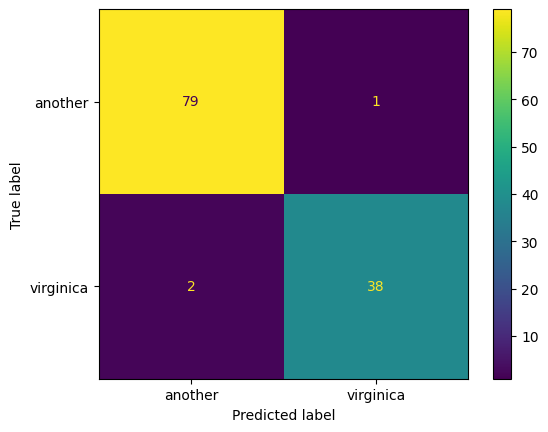

In [12]:
# X_train - данные для тренировки модели
# X_test - данные для проверки модели

# y_test  - целевые признаки тестовая часть датасэта
# y_train - целевые признаки тренировочная часть датасэта

# ПОСТРОИМ МАТРИЦУ ОШИБОК
conf_matrix = confusion_matrix(model.predict(X_train), y_train)

ConfusionMatrixDisplay(conf_matrix, display_labels=['another', 'virginica']).plot()